1. Розробити засоби для обліку обслуговування у стоматологічному центрі.
Лікар характеризується числовим ідентифікатором і прізвищем.
Пацієнт характеризується числовим ідентифікатором, прізвищем і датою народження. При цьому розглядають такі вікові категорії: діти до 16 років, дорослі від 16 до 60, пенсіонери після 60.
Вид операції, яку проводить лікар, характеризується числовим ідентифікатором, назвою і ціною за одиницю.
Запис про прийом лікаря містить дату, ідентифікатор пацієнта, ідентифікатор лікаря, ідентифікатор операції та кількість таких операцій за цей прийом.
Записи про прийоми подані кількома (не менше 2) окремими сsv-файлами, також окремими файлами подано дані про лікарів, пацієнтів та види операцій.
2. Вивести:
(а) таблицю, в якій для кожного лікаря пораховано зароблені ним кошти за весь час;
(6) діаграму до попереднього пункту;
(в) таблицю, в якій для кожного пацієнта пораховано кошти, витрачені ним за період часу, визна- чений віджетами;
(г) таблицю, в якій подано кількість виконаних операцій для кожної з вікових груп.
(д) таблицю, в якій для кожної операції пораховано отримані за них кошти за весь час;
(е) діаграму до попереднього пункту;
(ж) таблицю, в якій для вікової категорії, назва якої вибирається з випадаючого списку, подано перелік пацієнтів з відповідною кількістю операцій за весь час:
(и) таблицю, в якій для кожного лікаря подано перелік назв операцій, які він найбільше виконав за весь час.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import unittest

### Types:

In [2]:
class Doctor:
    def __init__(self, id_doctor, last):
        self.__id_doctor = id_doctor
        self.__last = last

    def __str__(self):
        return f"Doctor -> Last: {self.__last}, ID: {self.__id_doctor}"
        
    @property
    def id_doctor(self):
        return self.__id_doctor

    @id_doctor.setter
    def id_doctor(self, new_id):
        if new_id < 0:
            raise ValueError('Id must be >= 0')
        self.__id_doctor = new_id

    @property
    def last(self):
        return self.__last

    @last.setter
    def last(self, new_last):
        self.__last = new_last
        
        

In [3]:
class TestDoctor(unittest.TestCase):

    def setUp(self):
        self.doctor1 = Doctor(1, 'Smith')
        self.doctor2 = Doctor(2, 'Doe')

    def test_last(self):
        self.assertEqual(self.doctor1.last, 'Smith')
        self.assertEqual(self.doctor2.last, 'Doe')

        self.doctor1.last = 'Dosiak'
        self.doctor2.last = 'Petrenko'

        self.assertEqual(self.doctor1.last, 'Dosiak')
        self.assertEqual(self.doctor2.last, 'Petrenko')

    def test_id(self):
        self.assertEqual(self.doctor1.id_doctor, 1)
        self.assertEqual(self.doctor2.id_doctor, 2)

        self.doctor1.id_doctor = 3
        self.doctor2.id_doctor = 4

        self.assertEqual(self.doctor1.id_doctor, 3)
        self.assertEqual(self.doctor2.id_doctor, 4)

        with self.assertRaises(ValueError):
            self.doctor1.id_doctor = -1

    def test_print(self):
        self.assertEqual(str(self.doctor1), 'Doctor -> Last: Smith, ID: 1')
        self.assertEqual(str(self.doctor2), 'Doctor -> Last: Doe, ID: 2')

In [4]:
unittest.main(argv=[''], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


In [5]:
class Patient:
    def __init__(self, id_patient, last, birthday):
        self.__id_patient = id_patient
        self.__last = last
        self.__birthday = pd.to_datetime(birthday)

    def __str__(self):
        return f"Patient -> Last: {self.__last}, ID: {self.__id_patient}"
        
    @property
    def id_patient(self):
        return self.__id_patient

    @id_patient.setter
    def id_patient(self, new_id):
        if new_id < 0:
            raise ValueError('Id must be >= 0')
        self.__id_patient = new_id

    @property
    def last(self):
        return self.__last

    @last.setter
    def last(self, new_last):
        self.__last = new_last

    @property
    def birthday(self):
        return self.__birthday

    @birthday.setter
    def birthday(self, new_date):
        self.__birthday = new_date

    @property
    def age_category(self):
        years = (datetime.today() - self.__birthday).days // 365

        if datetime.today() < datetime(datetime.today().year, date.month, date.day):
            years -= 1

        if years < 16:
            return 'child'
        elif years >= 16 and years < 60:
            return 'adult'
        else:
            return 'pensioner'

In [6]:
class Operation:
    def __init__(self, id_operation, name, cost):
        self.__id_operation = id_operation
        self.__name = name
        self.__cost = cost

    def __str__(self):
        return f"Operation -> Name: {self.__name}, ID: {self.__id_operation}"
        
    @property
    def id_operation(self):
        return self.__id_operation

    @id_operation.setter
    def id_operation(self, new_id):
        if new_id < 0:
            raise ValueError('Id must be >= 0')
        self.__id_operation = new_id

    @property
    def name(self):
        return self.__name

    @name.setter
    def name(self, new_name):
        self.__name = new_name

    @property
    def cost(self):
        return self.__cost

    @cost.setter
    def cost(self, new_cost):
        self.__cost = new_cost

In [7]:
def calculate_age_category(date):
    years = (datetime.today() - date).days // 365

    if datetime.today() < datetime(datetime.today().year, date.month, date.day):
        years -= 1

    if years < 16:
        return 'child'
    elif years >= 16 and years < 60:
        return 'adult'

    else:
        return 'pensioner'

In [8]:
doctors = pd.read_csv('doctors.csv')

In [9]:
patients = pd.read_csv('patients.csv')
patients['Birthday'] = pd.to_datetime(patients['Birthday'])
patients['AgeCategory'] = patients['Birthday'].apply(calculate_age_category)

In [10]:
operations = pd.read_csv('operations.csv')

In [11]:
appointment1 = pd.read_csv('appointment1.csv')
appointment2 = pd.read_csv('appointment2.csv')
appointment = pd.concat([appointment1, appointment2], ignore_index=True)
appointment['Date'] = pd.to_datetime(appointment['Date'])

In [12]:
all_info = appointment.merge(doctors, on='IdDoctor')
all_info = all_info.merge(patients, on='IdPatient') 
all_info = all_info.merge(operations, on='IdOperation') 
all_info

,Date,IdPatient,IdDoctor,IdOperation,Quantity,LastNameDoctor,LastNamePatient,Birthday,AgeCategory,NameOperation,Cost
0,2024-11-28,101,1,10,2,Doe,Dosiak,2006-06-05,adult,Чистка зубів,2000
1,2024-11-29,103,2,12,1,Smith,Vasulenko,1957-02-25,pensioner,Відбілювання,3500
2,2024-11-30,102,2,11,3,Smith,Petrenko,2009-03-17,child,Пломбування,1500
3,2024-12-01,103,3,11,2,Stasiv,Vasulenko,1957-02-25,pensioner,Пломбування,1500
4,2024-12-02,102,1,10,3,Doe,Petrenko,2009-03-17,child,Чистка зубів,2000
5,2024-12-03,101,2,12,1,Smith,Dosiak,2006-06-05,adult,Відбілювання,3500


### Завдання а:

In [13]:
all_info['TotalCost'] = all_info['Cost'] * all_info['Quantity'] 
total_income_doctor = all_info.groupby('LastNameDoctor')['TotalCost'].sum().reset_index()
total_income_doctor

,LastNameDoctor,TotalCost
0,Doe,10000
1,Smith,11500
2,Stasiv,3000


### Завдання б:

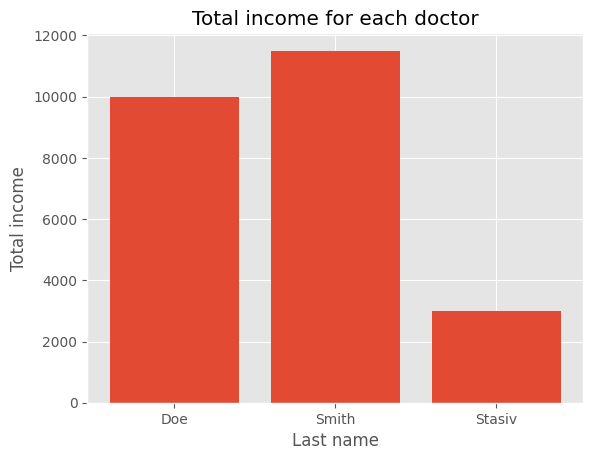

In [14]:
plt.style.use('ggplot')
plt.bar(total_income_doctor['LastNameDoctor'], total_income_doctor['TotalCost'])
plt.xlabel('Last name')
plt.ylabel('Total income')
plt.title('Total income for each doctor')
plt.show()

### Завдання в:

In [15]:
total_cost_patient = all_info.groupby(['Date', 'LastNamePatient'])['TotalCost'].sum().reset_index()

In [16]:
start_date = widgets.DatePicker(
    description = 'Pick start date:',
    value = total_cost_patient['Date'].min()
)

end_date = widgets.DatePicker(
    description = 'Pick end date:',
    value = total_cost_patient['Date'].max()
)

In [17]:
def calculate_cost_patient(start, end):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)

    filt = (total_cost_patient['Date'] >= start) & (total_cost_patient['Date'] <= end)
    filtered_df = total_cost_patient[filt]

    filtered_df = filtered_df.groupby('LastNamePatient')['TotalCost'].sum().reset_index()

    display(filtered_df)

In [18]:
widget = widgets.interactive(calculate_cost_patient, start=start_date, end=end_date)
display(widget)

interactive(children=(DatePicker(value=Timestamp('2024-11-28 00:00:00'), description='Pick start date:', step=…

### Завдання г:

In [19]:
amount_operations_for_category = all_info.groupby('AgeCategory')['Quantity'].sum().reset_index()
amount_operations_for_category

,AgeCategory,Quantity
0,adult,3
1,child,6
2,pensioner,3


### Завдання д:

In [20]:
total_income_operation = all_info.groupby('NameOperation')['TotalCost'].sum().reset_index()
total_income_operation

,NameOperation,TotalCost
0,Відбілювання,7000
1,Пломбування,7500
2,Чистка зубів,10000


### Завдання е:

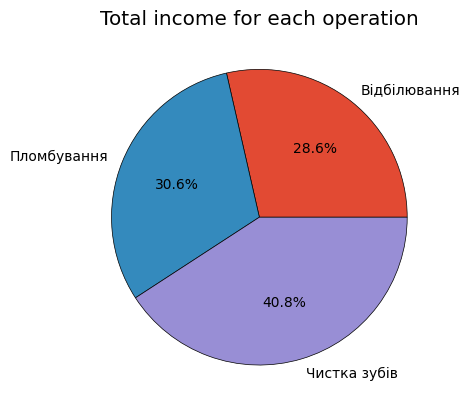

In [21]:
plt.pie(total_income_operation['TotalCost'], labels=total_income_operation['NameOperation'], wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%')
plt.title('Total income for each operation')
plt.show()

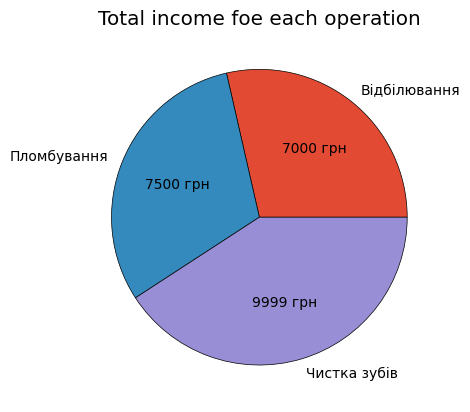

In [22]:
plt.pie(total_income_operation['TotalCost'], labels=total_income_operation['NameOperation'], wedgeprops={'edgecolor': 'black'}, autopct=lambda p: f'{int(p * (total_income_operation['TotalCost'].sum())/100)} грн')
plt.title('Total income foe each operation')
plt.show()

In [23]:
amount_operation = all_info.groupby(['AgeCategory', 'LastNamePatient'])['Quantity'].sum().reset_index()
group_by_category = amount_operation.groupby('AgeCategory')

In [24]:
def get_amount_operation(category):
    df = group_by_category.get_group(category)[['LastNamePatient', 'Quantity']]
    display(df)

In [25]:
drop_down = widgets.Dropdown(
    description='Choose an age category',
    options = patients['AgeCategory'].unique(),
    value = patients['AgeCategory'].iloc[0]
)

In [26]:
widget2 = widgets.interactive(get_amount_operation, category=drop_down)
display(widget2)

interactive(children=(Dropdown(description='Choose an age category', options=('adult', 'child', 'pensioner'), …

### Завдання и:

In [27]:
max_operations_doctor = all_info.groupby(['LastNameDoctor', 'NameOperation'])['Quantity'].sum().reset_index()
max_operations_for_each_doctor = max_operations_doctor.groupby('LastNameDoctor')['Quantity'].max().reset_index()
max_operations_for_each_doctor = max_operations_doctor.merge(max_operations_for_each_doctor)
max_operations_for_each_doctor

,LastNameDoctor,NameOperation,Quantity
0,Doe,Чистка зубів,5
1,Smith,Пломбування,3
2,Stasiv,Пломбування,2
